<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/PokemonTypeClassification/pokemonClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 Configuración y carga de los datos


In [1]:
import os
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
%cd "/content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification"
!ls
base_directory="/content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification"
original_directory="/content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/OriginalDataset"
data_directory="/content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Data"
models_directory="/content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Models"


Mounted at /content/gdrive
/content
/content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification
Data  Models  OriginalDataset  Resources  SmallPokemon


#1.0 Data Preparation


## Restructurando el dataset

Para predecir los pokemones. La estructura actual del dataset no es la más adecuada. Contiene un subfolder con el nombre del pokemon y sus imagenes de ejemplo. Nosotros queremos un subfolder con el tipo del pokemon y las imagenes de ejemplo. En esta sección vamos a reformatear los datos.

### Lista de pokemones que contiene el dataset original

Revisamos todos los pokemones que contiene el dataset original

In [2]:
import os
import pandas as pd
import numpy as np

pokemon_names = []
# Use os.listdir() to get a list of all items in the directory
names = os.listdir(original_directory)
# Loop through the names and check if each one is a directory
for name in names:
    name_path = os.path.join(original_directory, name)
    if os.path.isdir(name_path):
        pokemon_names.append(name)

# folder_names now contains the names of all folders in the specified directory
print(pokemon_names)

['Blastoise', 'Arbok', 'Butterfree', 'Bellsprout', 'Beedrill', 'Bulbasaur', 'Arcanine', 'Articuno', 'Alolan Sandslash', 'Alakazam', 'Chansey', 'Caterpie', 'Clefairy', 'Cloyster', 'Cubone', 'Charizard', 'Dewgong', 'Charmeleon', 'Charmander', 'Clefable', 'Diglett', 'Ditto', 'Dragonair', 'Dratini', 'Doduo', 'Eevee', 'Drowzee', 'Dodrio', 'Dugtrio', 'Dragonite', 'Electabuzz', 'Ekans', 'Exeggutor', 'Gengar', 'Fearow', 'Exeggcute', 'Gastly', 'Farfetchd', 'Electrode', 'Flareon', 'Geodude', 'Gloom', 'Goldeen', 'Golduck', 'Golbat', 'Gyarados', 'Growlithe', 'Grimer', 'Graveler', 'Golem', 'Hitmonchan', 'Haunter', 'Jigglypuff', 'Kabuto', 'Jynx', 'Jolteon', 'Hypno', 'Ivysaur', 'Hitmonlee', 'Horsea', 'Kadabra', 'Kabutops', 'Kakuna', 'Koffing', 'Kingler', 'Kangaskhan', 'Machamp', 'Krabby', 'Lapras', 'Lickitung', 'Machoke', 'Machop', 'Mankey', 'Magmar', 'Magikarp', 'Metapod', 'Marowak', 'Meowth', 'Magneton', 'Magnemite', 'Mewtwo', 'Mew', 'Nidorino', 'Nidoking', 'Nidoqueen', 'Ninetales', 'MrMime', 'Nido

Creamos el diccionario de pokemones por tipo.

In [3]:
pokemon_types = {
    'Wartortle': 'Water',
    'Vulpix': 'Fire',
    'Voltorb': 'Electric',
    'Vileplume': 'Grass',
    'Victreebel': 'Grass',
    'Venusaur': 'Grass',
    'Venonat': 'Bug',
    'Venomoth': 'Bug',
    'Vaporeon': 'Water',
    'Tentacruel': 'Water',
    'Seadra': 'Water',
    'Starmie': 'Water',
    'Zubat': 'Poison',
    'Zapdos': 'Electric',
    'Wigglytuff': 'Normal',
    'Weezing': 'Poison',
    'Weepinbell': 'Grass',
    'Weedle': 'Bug',
    'Tentacool': 'Water',
    'Spearow': 'Normal',
    'Tauros': 'Normal',
    'Staryu': 'Water',
    'Squirtle': 'Water',
    'Tangela': 'Grass',
    'Abra': 'Psychic',
    'Aerodactyl': 'Rock',
    'Alakazam': 'Psychic',
    'Alolan Sandslash': 'Ice',
    'Arbok': 'Poison',
    'Arcanine': 'Fire',
    'Articuno': 'Ice',
    'Beedrill': 'Bug',
    'Bellsprout': 'Grass',
    'Blastoise': 'Water',
    'Bulbasaur': 'Grass',
    'Butterfree': 'Bug',
    'Caterpie': 'Bug',
    'Chansey': 'Normal',
    'Charizard': 'Fire',
    'Charmander': 'Fire',
    'Charmeleon': 'Fire',
    'Clefable': 'Fairy',
    'Clefairy': 'Fairy',
    'Cloyster': 'Water',
    'Cubone': 'Ground',
    'Dewgong': 'Water',
    'Diglett': 'Ground',
    'Ditto': 'Normal',
    'Dodrio': 'Normal',
    'Doduo': 'Normal',
    'Dragonair': 'Dragon',
    'Dragonite': 'Dragon',
    'Dratini': 'Dragon',
    'Drowzee': 'Psychic',
    'Dugtrio': 'Ground',
    'Eevee': 'Normal',
    'Ekans': 'Poison',
    'Electabuzz': 'Electric',
    'Electrode': 'Electric',
    'Exeggcute': 'Grass',
    'Exeggutor': 'Grass',
    'Farfetchd': 'Normal',
    'Fearow': 'Normal',
    'Flareon': 'Fire',
    'Gastly': 'Ghost',
    'Gengar': 'Ghost',
    'Geodude': 'Rock',
    'Gloom': 'Grass',
    'Golbat': 'Poison',
    'Goldeen': 'Water',
    'Golduck': 'Water',
    'Golem': 'Ground',
    'Graveler': 'Ground',
    'Grimer': 'Poison',
    'Growlithe': 'Fire',
    'Gyarados': 'Water',
    'Haunter': 'Ghost',
    'Hitmonchan': 'Fighting',
    'Hitmonlee': 'Fighting',
    'Horsea': 'Water',
    'Hypno': 'Psychic',
    'Ivysaur': 'Grass',
    'Jigglypuff': 'Normal',
    'Jolteon': 'Electric',
    'Jynx': 'Ice',
    'Kabuto': 'Rock',
    'Kabutops': 'Rock',
    'Kadabra': 'Psychic',
    'Kakuna': 'Bug',
    'Kangaskhan': 'Normal',
    'Kingler': 'Water',
    'Koffing': 'Poison',
    'Krabby': 'Water',
    'Lapras': 'Water',
    'Lickitung': 'Normal',
    'Machamp': 'Fighting',
    'Machoke': 'Fighting',
    'Machop': 'Fighting',
    'Magikarp': 'Water',
    'Magmar': 'Fire',
    'Magnemite': 'Electric',
    'Magneton': 'Electric',
    'Mankey': 'Fighting',
    'Marowak': 'Ground',
    'Meowth': 'Normal',
    'Metapod': 'Bug',
    'Mew': 'Psychic',
    'Mewtwo': 'Psychic',
    'Moltres': 'Fire',
    'MrMime': 'Psychic',
    'Muk': 'Poison',
    'Nidoking': 'Poison',
    'Nidoqueen': 'Poison',
    'Nidorina': 'Poison',
    'Nidorino': 'Poison',
    'Ninetales': 'Fire',
    'Oddish': 'Grass',
    'Omanyte': 'Rock',
    'Omastar': 'Rock',
    'Onix': 'Rock',
    'Paras': 'Bug',
    'Parasect': 'Bug',
    'Persian': 'Normal',
    'Pidgeot': 'Normal',
    'Pidgeotto': 'Normal',
    'Pidgey': 'Normal',
    'Pikachu': 'Electric',
    'Pinsir': 'Bug',
    'Poliwag': 'Water',
    'Poliwhirl': 'Water',
    'Poliwrath': 'Water',
    'Ponyta': 'Fire',
    'Porygon': 'Normal',
    'Primeape': 'Fighting',
    'Psyduck': 'Water',
    'Raichu': 'Electric',
    'Rapidash': 'Fire',
    'Raticate': 'Normal',
    'Rattata': 'Normal',
    'Rhydon': 'Ground',
    'Rhyhorn': 'Ground',
    'Sandshrew': 'Ground',
    'Sandslash': 'Ground',
    'Scyther': 'Bug',
    'Seaking': 'Water',
    'Seel': 'Water',
    'Shellder': 'Water',
    'Slowbro': 'Water',
    'Slowpoke': 'Water',
    'Snorlax': 'Normal'
}


### Comprobamos que todos los pokemones en el dataset original tienen un tipo

In [4]:
no_existing_pokemon = []
for name in pokemon_names:
    if name not in pokemon_types:
        no_existing_pokemon.append(name)
print(no_existing_pokemon)
print("Número de pokemones: %i"%len(pokemon_names))
print("Número de no etiquetados: %i"%len(no_existing_pokemon))
if(len(no_existing_pokemon)==0):
    print("Wuu ya tienes todos tus pokemones etiquetados")
else:
    print("Te faltan etiquiquetas de los siguientes pokemones")
    print(no_existing_pokemon)


[]
Número de pokemones: 150
Número de no etiquetados: 0
Wuu ya tienes todos tus pokemones etiquetados


###Obtenemos todas los tipos registrados en el diccionario

Estas serán nuestras clases para el classificador. Las vamos a ordenar por orden alfabético más adelante.

In [5]:
types_list = list(set(pokemon_types.values()))
print(types_list)
print(sorted(types_list))

['Ghost', 'Bug', 'Grass', 'Poison', 'Dragon', 'Normal', 'Fairy', 'Rock', 'Ground', 'Ice', 'Fighting', 'Fire', 'Water', 'Psychic', 'Electric']
['Bug', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Water']


### Creamos un folder por tipo y ponemos en cada uno los pokemones del dataet original

In [6]:
print(types_list)

# Directory where you want to create the folders
data_dir = os.path.join(base_directory, "Data")
# Iterate through the list and create folders
for folder_name in types_list:
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.exists(folder_path):
      os.mkdir(folder_path)
      print(f"Created folder: {folder_path}")
    else:
        print(f"Folder already exists: {folder_path}")

['Ghost', 'Bug', 'Grass', 'Poison', 'Dragon', 'Normal', 'Fairy', 'Rock', 'Ground', 'Ice', 'Fighting', 'Fire', 'Water', 'Psychic', 'Electric']
Folder already exists: /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Data/Ghost
Folder already exists: /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Data/Bug
Folder already exists: /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Data/Grass
Folder already exists: /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Data/Poison
Folder already exists: /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Data/Dragon
Folder already exists: /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Data/Normal
Folder already exists: /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Data/Fairy
Folder already exists: /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Data/Rock
Folder already exists: /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Data/Ground
Folder alre

Es importante saber que tan balanceadas están nuestra clases. Vamos a crear un diccionario para contar la frecuencia por tipo

In [7]:
classFreq={key: 0 for key in sorted(types_list)}

### Reformatear los datos

Copiamos todos los pokemones del dataset original a un folder data donde cada subfolder es un typo de pokemon y contiene archivos de imagen renombrados como pokemonName_NumImg.jpg

In [8]:
import shutil
names = os.listdir(original_directory)
for origin_pokemonName_folder in names: #Iteramos sobre todos los pokemones
  count=0
  image_origin_folder=os.path.join(original_directory, origin_pokemonName_folder)# Es el path con el nombre de la carpeta del pokemon que contiene imagenes
  typeOfPokemon= pokemon_types[origin_pokemonName_folder]
  for image in os.listdir(image_origin_folder):
    image_origin_path = os.path.join(image_origin_folder, image)
    #Construimos el path de la nueva imagen como data/pokemonType/PokemonName_X.jpg por pokemon
    destination_folder_path=os.path.join(data_dir,typeOfPokemon)#Obtenemos el tipo del pokemon y vamos a ese folder
    _ , extension = os.path.splitext(image_origin_path)
    destination_image_path=os.path.join(destination_folder_path, str(origin_pokemonName_folder)+"_"+str(count)+extension)#Cremos el path de la imagen
    #print("source_folder %s"%image_origin_path)
    #print("destination_image_path %s"%destination_image_path)
    count+=1
    classFreq[typeOfPokemon]+=1
    if os.path.exists(destination_image_path):
      #print(f"The image file at {destination_image_path} exists.")
      #new_name=destination_image_path, str(origin_pokemonName_folder)+"_"+str(count)
      #os.rename(destination_image_path, new_name)
      #print(f"The image file  was renamed to {new_name}")
      pass
    else:
      print("Try to copy")
      if os.path.exists(image_origin_path):
        print("source_folder %s"%image_origin_path)
        print("destination_image_path %s"%destination_image_path)
        shutil.copy2(image_origin_path, destination_image_path)
        print("Copy Success")
      else:
         print(f"The path of the prigin image {image_origin_path} doesn't exist.")


Hasta ahora ya tenemos nuestro folder Data con la estructura que necesitamos

### Observamos el balance por tipo de pokemon

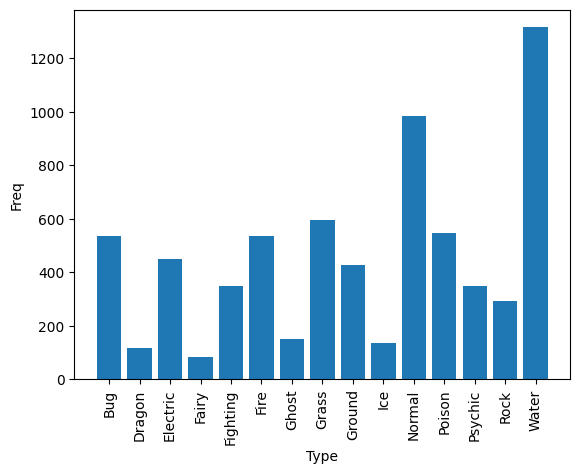

In [9]:
import matplotlib.pyplot as plt

keys = list(classFreq.keys())
values = list(classFreq.values())

# Create a bar plot
plt.bar(keys, values)

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Freq')
plt.xticks(rotation=90)
# Show the plot
plt.show()

Es claro que los pokemones de tipo agua predominan. Es importante tener esto encuenta al evaluar el modelo y que no se cargue hacia un tipo en específico.

In [29]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
max=np.max(values)
w_labels= list(map(lambda freq: (max/freq), values))
weight_label = {i: w_labels[i] for i in range(len(w_labels))}


{0: 2.455223880597015,
 1: 11.344827586206897,
 2: 2.917960088691796,
 3: 15.666666666666666,
 4: 3.781609195402299,
 5: 2.455223880597015,
 6: 8.773333333333333,
 7: 2.208053691275168,
 8: 3.074766355140187,
 9: 9.748148148148148,
 10: 1.3373983739837398,
 11: 2.41025641025641,
 12: 3.7707736389684814,
 13: 4.506849315068493,
 14: 1.0}

## División de train y test

### Folder a un dataset

Utilizamos la función de keras para pasar el folder a un dataset de keras

In [11]:
import tensorflow as tf
from tensorflow import keras
#print(data_dir)
img_height=100
img_width=100
img_size= [img_height,img_width]
batch_size_ds = 32
seed=42
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode="categorical",
    batch_size=batch_size_ds,
    image_size=img_size,
    seed=seed,
    shuffle=True,	)

Found 6850 files belonging to 15 classes.


### Particion del dataset

Dividimos el dataset de keras en train, validatio y test.

In [12]:
def get_dataset_partitions_tf(ds,ds_size,batch_size_ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True):
    assert (train_split + test_split + val_split) == 1
    ds_size= int(ds_size/batch_size_ds)
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(ds_size, seed=42)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

Verificamos que nuestras particiones se dividen correctamente.

In [13]:
dataset_size=6850
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset,dataset_size,batch_size_ds)
class_names = dataset.class_names
print(tf.data.experimental.cardinality(dataset))
print(tf.data.experimental.cardinality(train_ds))
print(tf.data.experimental.cardinality(val_ds))
print(tf.data.experimental.cardinality(test_ds))


tf.Tensor(215, shape=(), dtype=int64)
tf.Tensor(149, shape=(), dtype=int64)
tf.Tensor(32, shape=(), dtype=int64)
tf.Tensor(34, shape=(), dtype=int64)


Los Vemos la forma de los batches que tenemos. Las label están en one hot encoding

In [14]:
for image_batch, labels_batch in dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32, 15)


## Visualizamos algunas imagenes

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(15,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(15,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(15,), dtype=float32)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(15,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], shape=(15,), dtype=float32)
tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(15,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], shape=(15,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(15,), dtype=float32)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(15,), dtype=float32)


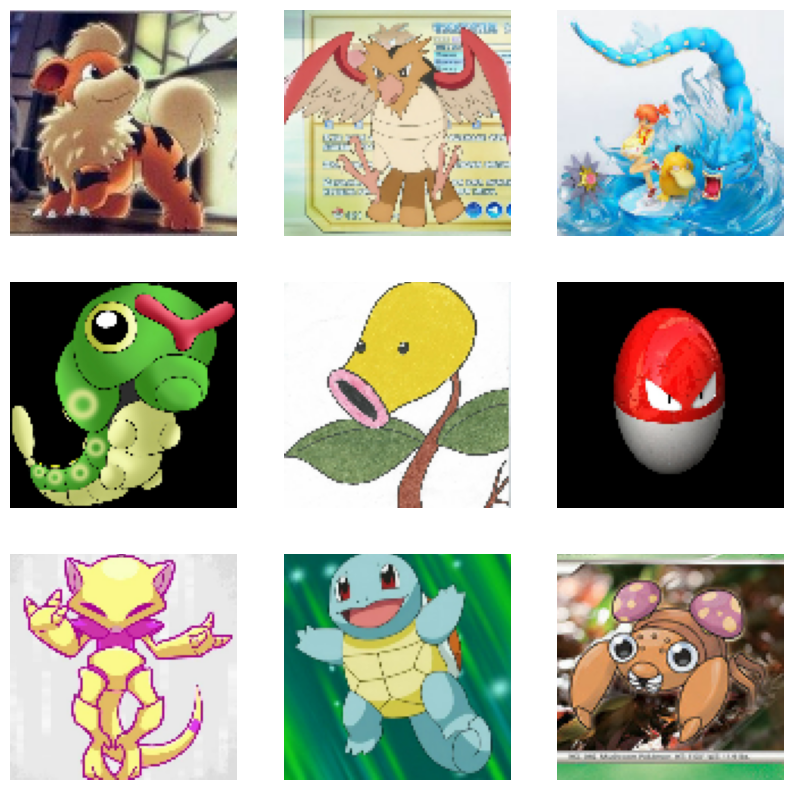

In [15]:
import matplotlib.pyplot as plt
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
i=0
#print(list(classFreq.keys()))
for images, labels in dataset.take(9):
  print(labels[0])
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[0].numpy().astype("uint8"))
  #plt.title()
  plt.axis("off")
  i+=1


## Augmentation


Debido a que el dataset tiene un desbalance en las clases image augmentation es una buena opción para mejorar el modelo. En este caso no tenemos ejemplos aún de augmentation.

In [ ]:
"""data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)"""

'data_augmentation = keras.Sequential(\n  [\n    layers.RandomFlip("horizontal",\n                      input_shape=(img_height,\n                                  img_width,\n                                  3)),\n    layers.RandomRotation(0.1),\n    layers.RandomZoom(0.1),\n  ]\n)'

#Modelos


## Save the models

Al final de cada entrenamiento vamos a llamar una callback para guardar el modelo.

In [20]:
# Create Tensorflow checkpoint object
# Add your own path in your drive mounted folder
checkpoint_path = models_directory
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                             save_freq = "epoch",
                             save_weights_only = True,
                             verbose = 1)

## Plot results function

In [27]:
def plotResults(epochs,acc,val_acc,loss,val_loss):
  epochs_range = range(epochs)
  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

  print(f"train acc: {acc[-1]:.4f}")
  print(f"val acc: {val_acc[-1]:.4f}")
  print(f"loss train: {loss[-1]:.4f}")
  print(f"loss val: {val_loss[-1]:.4f}")

def get_test_accuracy(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

## 1-Red neuronal simple

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

def baselineModel(input_shape, num_classes):
    model = models.Sequential()
    # Input layer
    model.add(layers.InputLayer(input_shape=input_shape))
    # Flatten layer
    model.add(layers.Flatten())
    # Dense layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256,activation='relu'))
    #Output layer
    model.add(layers.Dense(num_classes,activation='softmax'))

    return model
"""
input_shape = (100, 100, 3)
num_classes = len(dataset.class_names)  # Assuming dataset has been defined

baseline_model = baselineModel(input_shape, num_classes)
baseline_model.summary()"""


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 256)               7680256   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 15)                3855      
                                                                 
Total params: 7815695 (29.81 MB)
Trainable params: 7815695 (29.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
"""baseline_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
"""

In [23]:
"""epochs= 30

history = baseline_model.fit(
    x=train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1,
    class_weight=weight_label,
    callbacks = [checkpoint]
    )"""


Epoch 1/30
149/149 [==============================] - ETA: 0s - loss: 7.7347 - accuracy: 0.0218
Epoch 1: saving model to /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Models
149/149 [==============================] - 70s 282ms/step - loss: 7.7347 - accuracy: 0.0218 - val_loss: 2.7001 - val_accuracy: 0.0273
Epoch 2/30
149/149 [==============================] - ETA: 0s - loss: 7.8361 - accuracy: 0.0255
Epoch 2: saving model to /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Models
149/149 [==============================] - 64s 275ms/step - loss: 7.8361 - accuracy: 0.0255 - val_loss: 2.6926 - val_accuracy: 0.0254
Epoch 3/30
149/149 [==============================] - ETA: 0s - loss: 7.8743 - accuracy: 0.0190
Epoch 3: saving model to /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Models
149/149 [==============================] - 80s 385ms/step - loss: 7.8743 - accuracy: 0.0190 - val_loss: 2.6972 - val_accuracy: 0.0191
Epoch 4/30
149/149 [==============

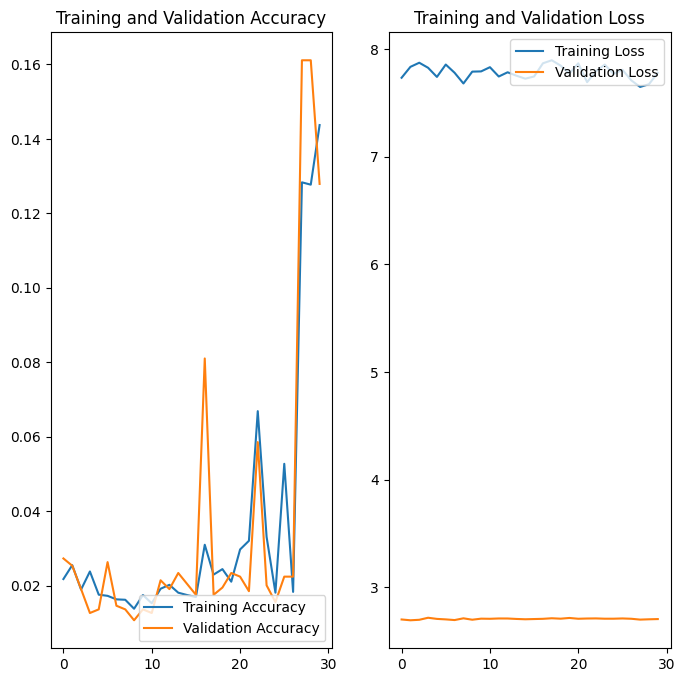

train acc: 0.1437
val acc: 0.1279
loss train: 7.7808
loss val: 2.7038


In [24]:
"""acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print(f"train acc: {acc[-1]:.4f}")
print(f"val acc: {val_acc[-1]:.4f}")
print(f"loss train: {loss[-1]:.4f}")
print(f"loss val: {val_loss[-1]:.4f}")
"""

En este caso, vamos a omitir probarlo con los datos de prueba. El modelo es muy malo, vamos a buscar otras alternativas para mejorarlo.

## 2-Modelo con transfer learning

Para el modelo vamos a utilizar una red preentrenada VGG16 imagenet. Para aprovechar el procesamiento de imagenes. Sobre esta red ponemos una capa densa de 256 neuronas y relu y finalmente el clasificador con el número de classes y softmax para calcular la probabilidad por clase.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

num_classes = len(dataset.class_names)
conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (100,100,3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))
conv_base.trainable = False
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dense_1 (Dense)             (None, 15)                3855      
                                                                 
Total params: 15898447 (60.65 MB)
Trainable params: 1183759 (4.52 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


### Train Model

Configuraciones para mejorar el entrenamiento.
(Sugerencia de tensorflow al entrenar imagenes)

In [19]:
"""model.get_compile_config()

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)"""



NameError: ignored

### Llamada a entrenamiento

In [ ]:
"""epochs= 10

history_tl = model.fit(
    x=train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1,
    class_weight=weight_label,
    callbacks = [checkpoint]
    )"""


Epoch 1/10
149/149 [==============================] - ETA: 0s - loss: 6.2736 - accuracy: 0.2051
Epoch 1: saving model to /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Models
149/149 [==============================] - 853s 5s/step - loss: 6.2736 - accuracy: 0.2051 - val_loss: 2.1908 - val_accuracy: 0.3086
Epoch 2/10
149/149 [==============================] - ETA: 0s - loss: 1.4158 - accuracy: 0.4230
Epoch 2: saving model to /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Models
149/149 [==============================] - 718s 5s/step - loss: 1.4158 - accuracy: 0.4230 - val_loss: 1.6716 - val_accuracy: 0.5098
Epoch 3/10
149/149 [==============================] - ETA: 0s - loss: 0.9310 - accuracy: 0.5908
Epoch 3: saving model to /content/gdrive/MyDrive/DataSetIA/PokemonTypeClassification/Models
149/149 [==============================] - 723s 5s/step - loss: 0.9310 - accuracy: 0.5908 - val_loss: 1.4172 - val_accuracy: 0.6104
Epoch 4/10
149/149 [====================

### Resultados del entrenamiento


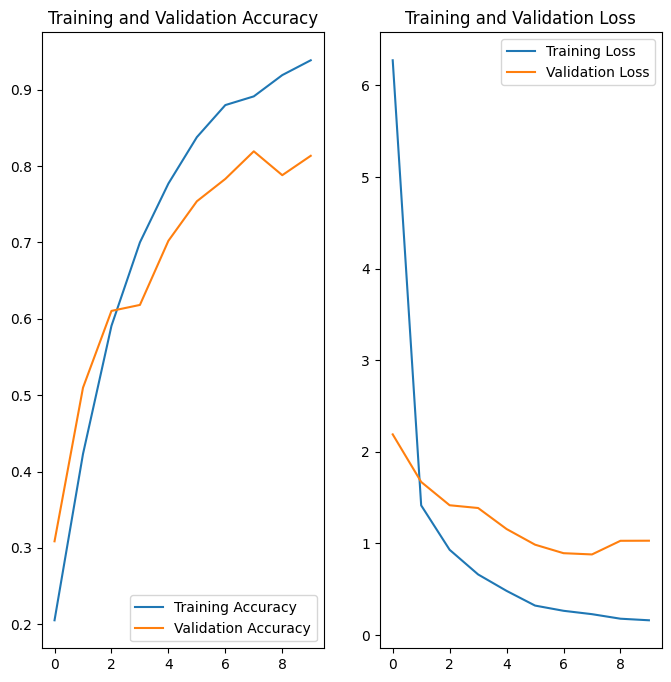

train acc: 0.9386
val acc: 0.8135
loss train: 0.1619
loss val: 1.0303


In [ ]:
acc = history_tl.history['accuracy']
val_acc = history_tl.history['val_accuracy']
loss = history_tl.history['loss']
val_loss = history_tl.history['val_loss']

plotResults(epochs,acc,val_acc,loss,val_loss)

### Evaluación

Probamos nuestro modelo con los datos de test

In [ ]:
get_test_accuracy(model,test_ds)

accuracy: 0.785


### Guardamos nuestros pesos

In [ ]:
# Create Tensorflow checkpoint object
# Add your own path in your drive mounted folder
checkpoint_path = models_directory
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                             save_freq = "epoch",
                             save_weights_only = True,
                             verbose = 1)

### (Opcional) Guardar un modelo completo

In [ ]:
#model.save(models_directory+"/model_v3")
#model.save(models_directory+"/model_v3.h5")

## 3-Modelo con transfer learning y dataset balanceado


### Recuperar el dataset nuevamente

In [44]:
img_height=100
img_width=100
img_size= [img_height,img_width]
batch_size = 32
seed=42
dataset_balanced = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    seed=seed,
    shuffle=True,	)



Found 6850 files belonging to 15 classes.


In [55]:
def custom_augmentation(image, label):
    # Convert one-hot encoded label to integer
    label_idx = tf.argmax(label, axis=-1)

    # Get the augmentation ratio for the current label
    augmentation_ratio = weight_label[label_idx]
    # Calculate the number of augmentations based on the ratio
    num_augmentations = int(np.ceil(augmentation_ratio))

    # Apply augmentation based on the calculated number of times
    for _ in range(num_augmentations):
        # Apply flip left-right
        image = tf.image.random_flip_left_right(image)
        # Apply rotation (between -45 and 45 degrees)
        image = tf.image.rot90(image, k=np.random.randint(4))
        # Apply contrast adjustment
        image = tf.image.random_contrast(image, lower=0.0, upper=1.0)

    return image, label

In [56]:
"""dataset_balanced = dataset_balanced.map(
    lambda image, label: (tf.image.convert_image_dtype(image, tf.float32), label)
).cache().map(
    custom_augmentation
).batch(
    batch_size
).repeat(2)"""

TypeError: ignored

In [ ]:
dataset_size=6850
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset,dataset_size,batch_size_ds)
class_names = dataset.class_names
print(tf.data.experimental.cardinality(dataset))
print(tf.data.experimental.cardinality(train_ds))
print(tf.data.experimental.cardinality(val_ds))
print(tf.data.experimental.cardinality(test_ds))

Sabemos las proporciones en las que tenemos que aumentar los datos de acuerdo a la cantidad de etiquetas que hay,lo podemos ver en el siguiente diccionario:

In [30]:
weight_label

{0: 2.455223880597015,
 1: 11.344827586206897,
 2: 2.917960088691796,
 3: 15.666666666666666,
 4: 3.781609195402299,
 5: 2.455223880597015,
 6: 8.773333333333333,
 7: 2.208053691275168,
 8: 3.074766355140187,
 9: 9.748148148148148,
 10: 1.3373983739837398,
 11: 2.41025641025641,
 12: 3.7707736389684814,
 13: 4.506849315068493,
 14: 1.0}

### Definición del modelo

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
def model_tl_balanced(input_shape, num_classes):
    conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (100,100,3))
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dense(num_classes,activation='softmax'))
    conv_base.trainable = False

    return model
input_shape = (100, 100, 3)
model_tl_balanced = model_tl_balanced(input_shape, num_classes)
model_tl_balanced.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               1179904   
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 15)                3855      
                                                       

### Entrenamiento

In [ ]:
epochs= 20
history_tl_balanced = model_tl_balanced.fit(
    x=train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1,
    class_weight=weight_label,
    callbacks = [checkpoint]
    )

### Resultados del entrenamiento

In [ ]:
acc = history_tl_balanced.history['accuracy']
val_acc = history_tl_balanced.history['val_accuracy']
loss = history_tl_balanced.history['loss']
val_loss = history_tl_balanced.history['val_loss']

plotResults(epochs,acc,val_acc,loss,val_loss)

###Evaluación

In [ ]:
get_test_accuracy(model,test_ds)

### Guardamos los pesos y el modelo

In [ ]:
checkpoint_path = models_directory
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                             save_freq = "epoch",
                             save_weights_only = True,
                             verbose = 1)

In [ ]:
#model.save(models_directory+"/model_balanced_v1")
model_tl_balanced.save(models_directory+"/model_balanced_v1y.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Resultados y bitácora de modelos:

En esta sección se describen las caracteristicas de entrenamiento. Los resultados y el link a los pesos guardados por si se quiere seguir entrenando alguna versión

## Version base


**Train Accuarcy: 0.1437**


Batch_size: 32

Epochs: 30

train acc: 0.1437
val acc: 0.1279
loss train: 7.7808
loss val: 2.7038



https://drive.google.com/drive/folders/1bdrqegSip4sAo-ELEL9L_hzUMP1wvwZs?usp=drive_link


Nos damos cuenta que el modelo no es lo suficientemente complejo como para aprender los patrones. Reconocer pokemones por tipo no es una tarea fácil. Podemos aumentar la complejidad de la red o entrenarla por mucho tiempo para mejorar el nivel de abstracción de la red. Pero esto nos llevaría mucho tiempo. Además el dataset no es tan amplio como para implementar muchas capas y esperar buenos resultados. Por este motivo vamos a optar por usar transfer learning. Una gran alternativa, una red pre-entrenada que permite abstraer información de las imagenes y sobre esa red colocaremos otra capa para clasificar pokemones.

## Versiones con Transfer Learning

### Versión 1. Transfer learning VGG16 Vanilla





**Train Accuarcy: 0.2217**

**Test Acuarcy : 0.292**

Modificaciones : Ninguna

Batch_size: 1

Epochs: 1

- loss: 4.4156
- val_loss: 2.3984
- val_accuracy: 0.2629

El problema de esta configuración es que el batch es muy pequeño y tardaba demasiado en entrenar.


### Versión 2. Weight labels



**Train Accuarcy: 0.2921**

**Test Acuarcy :  0.256**

Modificaciones : Se agregó la configuración de weight_labels a la parte de entrenamiento. Dandole pesos de acuerdo al número etiquetas por clase.

Batch_size: 1
Epochs: 10

- loss: 1.838
- val_loss: 2.3798
- val_accuracy:  0.2551

train_results:
https://drive.google.com/file/d/1ht45QMFGIWj5Rs7YQlVDcuaGTAhz487M/view?usp=drive_link


### Versión 3. Transfer learning con mejores batches y más entrenamiento




**Train Accuarcy: 0.9386**

**Test Acuarcy :  0.785**

Modificaciones : Con la misma estructura que la versión 1 pero dejandolo entrenar por 10 épocas

Batch_size: 32
Epochs: 10

- loss: 0.1619
- val_loss: 1.0303
- val_accuracy: 0.8135

train_results:
https://drive.google.com/file/d/1huTzOubNrabmEod0Q2iaLKvGh0MpODlV/view?usp=sharing

# Conclusiones

De momento usando solo transfer learning tenemos overfiting en el entrenamiento. Aún podemos hacer algo para balancear el dataset ya que hay muchos pokemones agua.